Buriola Lorenzo ID: 2021860

# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
seed = 987654321
np.random.seed(seed)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[-m_test:]
y_train, y_test = y[:m_training], y[-m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 56 62 61 51 57 68 67 65 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [398 400 409 391 414 418 438 383 365 384]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


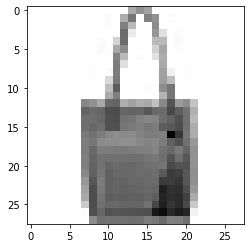

LABEL: 8
INPUT:


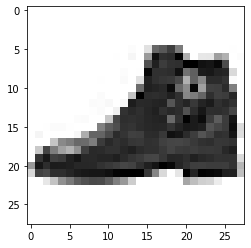

LABEL: 9
INPUT:


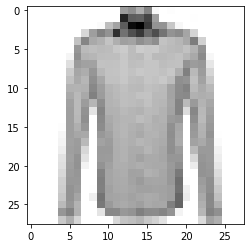

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, learning_rate_init=.1)

cross_val = GridSearchCV(mlp, parameters, cv=5, return_train_score=True, verbose = 3)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR NN')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:, 4:]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  hidden_layer_sizes=(10,), score=(train=0.463, test=0.408), total=   0.6s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(10,), score=(train=0.406, test=0.333), total=   0.7s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(10,), score=(train=0.823, test=0.608), total=   0.8s
[CV] hidden_layer_sizes=(10,) ........................................
[CV]  hidden_layer_sizes=(10,), score=(train=1.000, test=0.775), total=   1.1s
[CV] hidden_layer_sizes=(10,) ........................................


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), score=(train=0.994, test=0.792), total=   1.5s
[CV] hidden_layer_sizes=(20,) ........................................
[CV]  hidden_layer_sizes=(20,), score=(train=1.000, test=0.758), total=   1.2s
[CV] hidden_layer_sizes=(20,) ........................................
[CV]  hidden_layer_sizes=(20,), score=(train=1.000, test=0.758), total=   1.2s
[CV] hidden_layer_sizes=(20,) ........................................
[CV]  hidden_layer_sizes=(20,), score=(train=1.000, test=0.758), total=   1.2s
[CV] hidden_layer_sizes=(20,) ........................................
[CV]  hidden_layer_sizes=(20,), score=(train=1.000, test=0.775), total=   1.2s
[CV] hidden_layer_sizes=(20,) ........................................
[CV]  hidden_layer_sizes=(20,), score=(train=0.998, test=0.842), total=   1.2s
[CV] hidden_layer_sizes=(30,) ........................................
[CV]  hidden_layer_sizes=(30,), score=(train=1.000, test=0.767), total=   1.4s
[CV] hidden_layer_siz

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   23.6s finished


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (30,)}

Score with best parameters:
0.7833333333333333

All scores on the grid:


,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,"(10,)","{'hidden_layer_sizes': (10,)}",0.408333,0.333333,0.608333,0.775000,0.791667,0.583333,0.186488,4,0.462500,0.406250,0.822917,1.000000,0.993750,0.737083,0.255819
1,"(20,)","{'hidden_layer_sizes': (20,)}",0.758333,0.758333,0.758333,0.775000,0.841667,0.778333,0.032318,2,1.000000,1.000000,1.000000,1.000000,0.997917,0.999583,0.000833
2,"(30,)","{'hidden_layer_sizes': (30,)}",0.766667,0.716667,0.800000,0.775000,0.858333,0.783333,0.046248,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.775000,0.475000,0.675000,0.716667,0.808333,0.690000,0.116952,3,0.939583,0.520833,0.808333,0.900000,0.883333,0.810417,0.150923
4,"(30, 30, 20)","{'hidden_layer_sizes': (30, 30, 20)}",0.508333,0.525000,0.250000,0.716667,0.108333,0.421667,0.215806,5,0.579167,0.572917,0.281250,0.872917,0.108333,0.482917,0.264744


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 64, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

cross_val = GridSearchCV(mlp, parameters, cv = 5, return_train_score = True, verbose = 3)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR NN')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:,4:]

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] batch_size=1 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... batch_size=1, score=(train=0.092, test=0.092), total=  27.9s
[CV] batch_size=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV] .... batch_size=1, score=(train=0.092, test=0.100), total=  29.2s
[CV] batch_size=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.0s remaining:    0.0s


[CV] .... batch_size=1, score=(train=0.094, test=0.092), total=  16.8s
[CV] batch_size=1 ....................................................
[CV] .... batch_size=1, score=(train=0.113, test=0.108), total=  14.2s
[CV] batch_size=1 ....................................................
[CV] .... batch_size=1, score=(train=0.096, test=0.092), total=  17.7s
[CV] batch_size=64 ...................................................
[CV] ... batch_size=64, score=(train=1.000, test=0.792), total=   1.3s
[CV] batch_size=64 ...................................................
[CV] ... batch_size=64, score=(train=1.000, test=0.725), total=   1.4s
[CV] batch_size=64 ...................................................
[CV] ... batch_size=64, score=(train=1.000, test=0.783), total=   1.0s
[CV] batch_size=64 ...................................................
[CV] ... batch_size=64, score=(train=1.000, test=0.783), total=   1.1s
[CV] batch_size=64 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.0min finished


RESULTS FOR NN

Best parameters set found:
{'batch_size': 64}

Score with best parameters:
0.7883333333333333

All scores on the grid:


,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1,{'batch_size': 1},0.091667,0.100,0.091667,0.108333,0.091667,0.096667,0.006667,3,0.091667,0.091667,0.09375,0.1125,0.095833,0.097083,0.007862
1,64,{'batch_size': 64},0.791667,0.725,0.783333,0.783333,0.858333,0.788333,0.042361,1,1.000000,1.000000,1.00000,1.0000,1.000000,1.000000,0.000000
2,480,{'batch_size': 480},0.808333,0.750,0.783333,0.766667,0.825000,0.786667,0.027183,2,1.000000,1.000000,1.00000,1.0000,1.000000,1.000000,0.000000


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

##### ANSWER 1

The best architecture is the one with one hidden layer with 30 neurons. Using fewer neurons seems to be insufficient and for 10 neurons the algorithm sometimes does not converge. Using a more complex neural network with multiple hidden layers does not pay off in terms of validation accuracy (probably they are too complex and they overfit data).

Concerning the minibatch size, among the tested ones, the best results are obtained using 64 samples. Using a minibatch size of 1 (SGD), the algorithm converges very slowly and has bad performances (due to the high value of the learning rate). Using a small number of training samples (600) we can still use the standard gradient descent without being too worried for the complexity of the computation. In this case the algorithm converges for all batch sizes (NO Warnings) but as said before for pure SGD it is really slow and unsatisfying (remember that each epoch of SGD is composed by 600 gradient descent steps).

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.46 sec

Training MLP of size (20,) ...
Done, training time: 1.93 sec

Training MLP of size (30,) ...
Done, training time: 2.07 sec

Training MLP of size (30, 20) ...
Done, training time: 2.04 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 2.73 sec



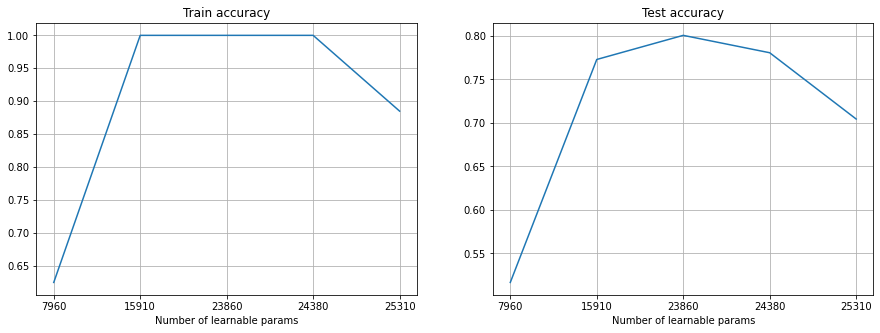

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    #Note that the parameter n_iter_no_change was used in this occasion (see the comment below)
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, learning_rate_init=.1, n_iter_no_change = 50, batch_size = 64)
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


### QUESTION 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

##### ANSWER 2
In this case the simplest model (one hidden layer with 10 neurons) has the worst training accuracy and test accuracy (too few parameters, probablly underfitting data). Increasing the complexity of the model the training accuracy becomes 1. The test accuracy keeps improving for models with one hidden layer, reaching its max value for the model with 30 neurons. 
With bigger numbers of parameters (complexity of the system) the test accuracy starts decreasing. This is probably due to the fact that the model becomes "too complex" and start overfitting the data, affecting the test error. 
Concerning the time it can be seen that in this case the time effectively increases as long as we test more complex models (this point changes at every run in my PC, sometimes the most complex models (two or more hidden layers) have an inferior time than the (30,) hidden layers model).

Looking at the last model (three hidden layers) training error, we can see that it is less than the other ones. This can be caused by a specific behaviour of the algorithm. For complex models and high learning rate (0.1), the loss trend is very unstable: sometimes the loss reaches a minimum and start increasing and remains bigger for enough iterations that make the algorithm stop. Increasing the parameter __n_iter_no_change__ (in this case conditions we chose it to be 50 iteration) we can force the algorithm to continue runnig hoping to find new best minima. Let us see the loss behaviour for the most complex model:

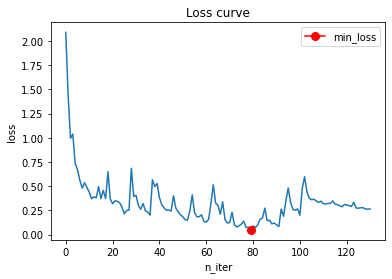

In [11]:
mlp = MLPClassifier(hidden_layer_sizes = (30,30,20,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, learning_rate_init=.1, batch_size = 64, n_iter_no_change = 50)
mlp.fit(X_train, y_train)
loss_min = np.array(mlp.loss_curve_).min()
i_min = np.array(mlp.loss_curve_).argmin()
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.plot(i_min, loss_min, marker = 'o', color = 'r', markersize = 8, label = 'min_loss')
plt.legend()
ax.set_title('Loss curve')
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
plt.show()

Due to the unstability of the convergence the algorithm reaches a minimum and the remains bigger for 50 iterations. This can be easily seen from the plot of the loss curve. The computation could stop earlier respect to the other model: this can be the cause of a small training accuracy for this model ((30, 20, 20,)). Because of that, eventually it can happen that the most complicate models timing results less than the simplest (anyway this is not the case).

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [12]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
parameters = {'learning_rate_init':lr_list}

mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, batch_size = 64)
cross_val = GridSearchCV(mlp, parameters, cv = 5, return_train_score = True, verbose = 3)
cross_val.fit(X_train, y_train)
print()

print ('RESULTS FOR NN\n')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] learning_rate_init=0.001 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  learning_rate_init=0.001, score=(train=0.990, test=0.825), total=   7.6s
[CV] learning_rate_init=0.001 ........................................


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s


[CV]  learning_rate_init=0.001, score=(train=0.988, test=0.758), total=   8.6s
[CV] learning_rate_init=0.001 ........................................


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  learning_rate_init=0.001, score=(train=0.983, test=0.783), total=  12.9s
[CV] learning_rate_init=0.001 ........................................


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  learning_rate_init=0.001, score=(train=0.994, test=0.775), total=   9.4s
[CV] learning_rate_init=0.001 ........................................


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  learning_rate_init=0.001, score=(train=0.992, test=0.808), total=   7.4s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=(train=1.000, test=0.758), total=   3.8s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=(train=1.000, test=0.717), total=   3.7s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=(train=1.000, test=0.792), total=   3.6s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=(train=1.000, test=0.758), total=   3.8s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=(train=1.000, test=0.817), total=   3.8s
[CV] learning_rate_init=0.1 ..........................................
[CV]  learning_rate_init=0.1, score=(train=1.000, test=0.792), total=   1.2s
[CV] learning_rate_init=0.1 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished



RESULTS FOR NN


Best parameters set found:
{'learning_rate_init': 0.001}

Score with best parameters:
0.79


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


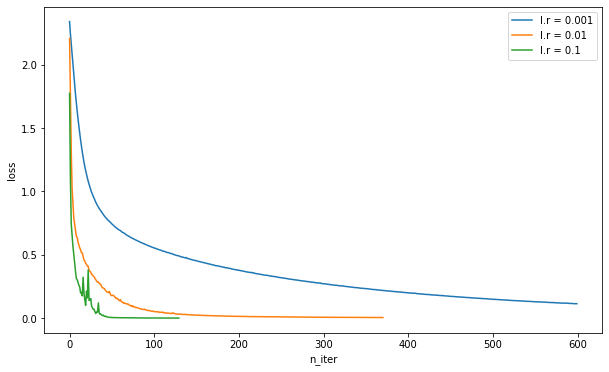

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
for l in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, learning_rate_init = l, batch_size = 64, n_iter_no_change = 50)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = 'l.r = ' + str(l))
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
ax.legend()
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

##### ANSWER 3
Using a small learning rate (l = 0.001) in this case gives the best results in terms of validation errors but the algorithm converges slowly (here it does not converge in 600 iterations). Using a grater learning rate gives us a slightly worse validation error, anyway this difference is quite neglegible. On the other hand the algorithm converges faster. From the plot it can be seen that for a l.r. of 0.1 convergence is faster but less stable. We discussed before some problems that can occur with unstable loss trend due to high learning rates and complex models. For these reasons the 0.01 learning rate has been chosen as the best parameter.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.208000


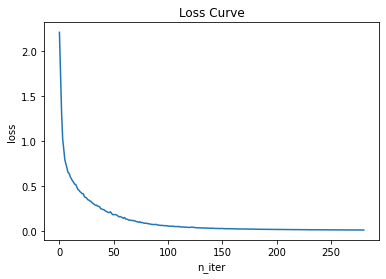

In [14]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, batch_size=64, learning_rate_init=0.01)
mlp.fit(X_train, y_train)

print ('\nRESULTS FOR BEST NN\n')

training_error = 1-mlp.score(X_train, y_train)
test_error = 1-mlp.score(X_test, y_test)

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('n_iter')
plt.ylabel('loss')
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
#X = X[permutation]
#y = y[permutation]

Note that we chose to eliminate this permutation to avoid that some training samples for the mlp_small could be put in the new test set. In this way we are sure that the test set is "new" either for the mlp_small and for the mlp_large. 

In [16]:
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [408 414 385 412 389 378 411 402 432 369]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN

Best NN training error: 0.002500
Best NN test error: 0.176589


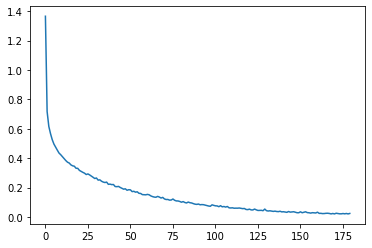

In [17]:
mlp_large = MLPClassifier(hidden_layer_sizes=(30,), max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=seed, batch_size=64, learning_rate_init=0.01)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR BEST NN\n')

training_error = 1-mlp_large.score(X_train, y_train)
test_error = 1-mlp_large.score(X_test, y_test)

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_large.loss_curve_)
plt.show()

### QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

##### ANSWER 4
As we expected, using more points for training, the test error decreases (from 0.22 to 0.18). The training error remains 0.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


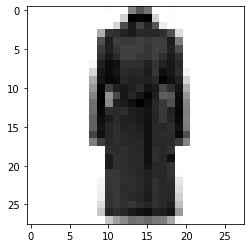

LABEL: 4
NN_prediction:  1
large_NN_prediction:  4


In [18]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

index = 0

for i in range(len(NN_prediction)):
    if NN_prediction[i] != large_NN_prediction[i]:
        if large_NN_prediction[i] == y_test[i]:
            index = i
            break

plot_input(X_test,y_test,index)

print("NN_prediction: ", NN_prediction[index])
print("large_NN_prediction: ", large_NN_prediction[index])     

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


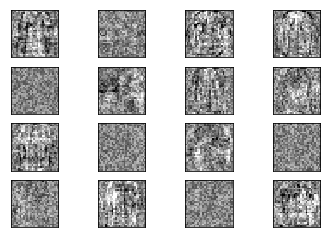

Weights with 4000 data points:


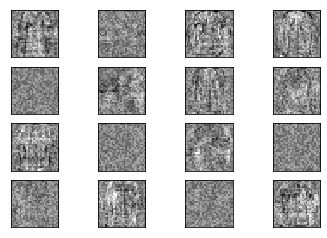

In [19]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

### QUESTION 5

Describe what do you observe by looking at the weights.

##### ANSWER 5
Looking at the weights we can recognize some patterns that remind to the shape of some kind of shirts or dress. Anyway that is not visible for each set of weights. The algorithm is probably trying to detect edges.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [20]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

best_SVM = SVC(kernel = 'rbf', C = 5, gamma=0.005)

best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.070400
Best SVM test error: 0.149400


In [21]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=800)
regL2.fit(X_train, y_train)

training_error = 1 - regL2.score(X_train, y_train)
test_error = 1 - regL2.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.045200
Best regularized logistic regression test error: 0.190400


### QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

##### ANSWER 6
In terms of test error, the best results are given by the SVM (0.15) followed by the NN (0.18). The logistic regression is slightly worse than the NN (0.19). Concerning the training error the NN one is 0, while in the other two cases it is bigger. This is probably due to the regularization in the SVM an LR and to the fact that NN is a more complex model and probably bring to a better adaptation to the training data. 